# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [5]:
sales = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', sep=';')

In [8]:
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [7]:
sales.describe()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount
count,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,1.351194e+06
mean,3.379063e+06,1.199972e+01,4.939567e+04,2.265474e+02,1.300401e+01,1.498871e-01
std,1.950903e+06,6.632689e+00,2.850504e+04,1.304744e+02,7.209701e+00,4.999989e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01
25%,1.689532e+06,6.000000e+00,2.470700e+04,1.140000e+02,7.000000e+00,1.000000e-01
50%,3.379063e+06,1.200000e+01,4.941400e+04,2.270000e+02,1.300000e+01,1.000000e-01
75%,5.068594e+06,1.800000e+01,7.407500e+04,3.400000e+02,1.900000e+01,2.000000e-01
max,6.758125e+06,2.300000e+01,9.875900e+04,4.520000e+02,2.500000e+01,2.000000e-01


### Convert the SalesDate field to a datetime data type.

In [10]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

### Create a line chart showing the number of total units sold per day in February.

In [149]:
sales['Date'] = sales['SalesDate'].dt.date
sales['Hour'] = sales['SalesDate'].dt.hour

In [68]:
def linechart(df, x, length=8, width=15, title=''):
    if df.index.name != x:
        df = df.set_index(x)

    ax = df.plot(figsize=(width, length), cmap='Set2')
    ax.legend(loc='upper center', bbox_to_anchor=(.5, -.1), fancybox=True, shadow=True, ncol=4)

    plt.title(title + '\n', fontsize=16)

In [151]:
daily_units = sales.groupby('Date', as_index=False).agg({'Quantity': 'sum'})
daily_units

,Date,Quantity
0,2018-01-01,674961
1,2018-01-02,675319
2,2018-01-03,670676
3,2018-01-04,669381
4,2018-01-05,678827
...,...,...
124,2018-05-05,673794
125,2018-05-06,672185
126,2018-05-07,676569
127,2018-05-08,675607


In [153]:
feb_units = daily_units.loc[(daily_units['Date'] >= pd.to_datetime('2018-02-01')) & (daily_units['Date'] < pd.to_datetime('2018-03-01'))]
feb_units

,Date,Quantity
31,2018-02-01,672020
32,2018-02-02,675124
33,2018-02-03,671666
34,2018-02-04,673154
35,2018-02-05,670170
36,2018-02-06,670404
37,2018-02-07,669339
38,2018-02-08,675238
39,2018-02-09,672896
40,2018-02-10,672100


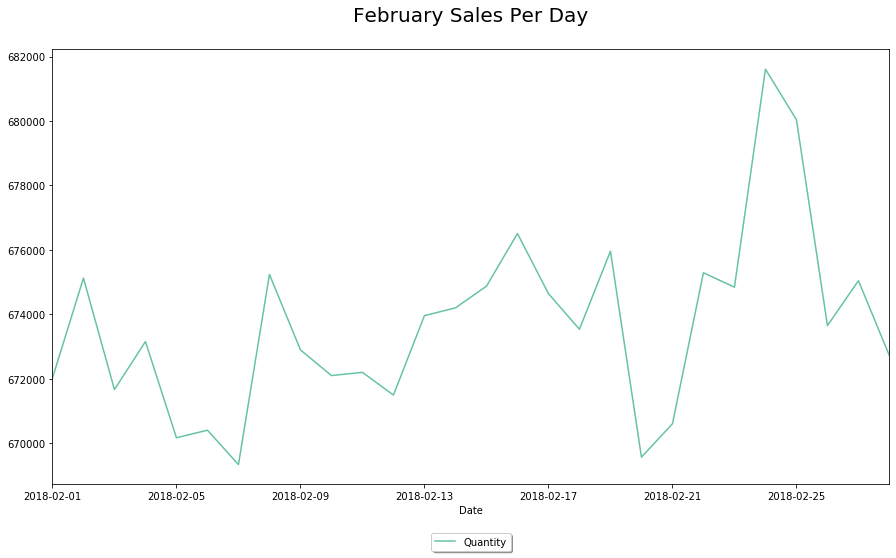

In [154]:
linechart(feb_units, 'Date', title='February Sales Per Day')

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [155]:
daily_units_per_product = sales.groupby(['Date', 'ProductID'], as_index=False).agg({'Quantity': 'sum'})
daily_units_per_product.head()

,Date,ProductID,Quantity
0,2018-01-01,1,1567
1,2018-01-01,2,1707
2,2018-01-01,3,1121
3,2018-01-01,4,1503
4,2018-01-01,5,1748


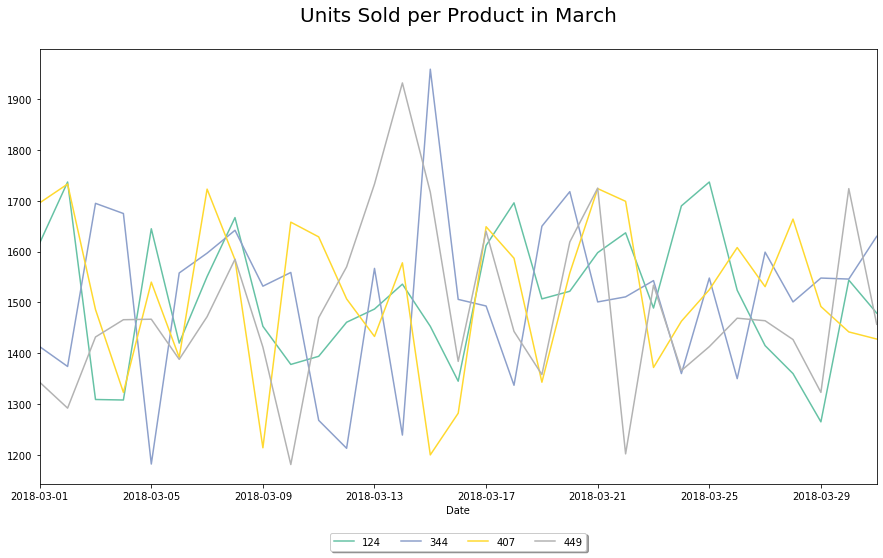

In [158]:
# Filter by units in March
march_units = daily_units_per_product.loc[(daily_units_per_product['Date'] >= pd.to_datetime('2018-03-01')) &
                                            (daily_units_per_product['Date'] < pd.to_datetime('2018-04-01'))]
# Filter by only desired product ids                                            
march_unit_products = march_units.loc[march_units['ProductID'].isin([124, 344, 407, 449])]
# Pivot each product as column
march_pivot = pd.pivot(march_unit_products, index='Date', columns='ProductID', values='Quantity')
# Plot linechart
linechart(march_pivot, 'Date', title='Units Sold per Product in March')

### Create a bar chart that shows units sold by each hour of the day.

In [105]:
def barchart(df, x, y, groups=None, length=8, width=14, title=''):
    plt.figure(figsize=(width,length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + '\n', fontsize=16)

In [160]:
hourly_units = sales.groupby('Hour', as_index=False).agg({'Quantity': 'sum'})
hourly_units

,Hour,Quantity
0,0.0,3627044
1,1.0,3622628
2,2.0,3630784
3,3.0,3616872
4,4.0,3620283
5,5.0,3618830
6,6.0,3630426
7,7.0,3622932
8,8.0,3627311
9,9.0,3630320


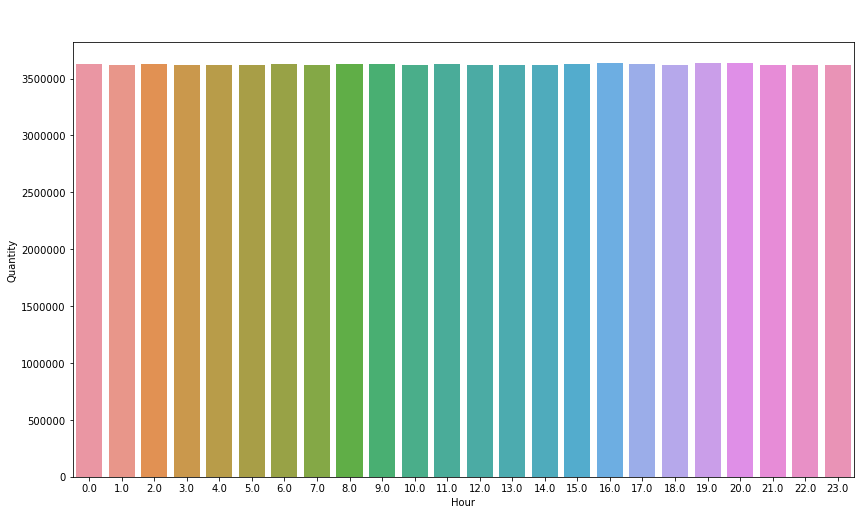

In [161]:
barchart(hourly_units, x='Hour', y='Quantity')

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [112]:
def heatmap(df, length=8, width=18, title=''):
    plt.figure(figsize=(width,length))
    ax = sns.heatmap(df, annot=True, fmt='.1f', cmap='Reds', linewidths=.01)
    plt.title(title + '\n', fontsize=16)

In [123]:
hour_weekday_total = sales.groupby(['Weekday', 'Hour']).sum().reset_index()
hour_weekday_total['Hour'] = hour_weekday_total['Hour'].astype('int64')
hour_weekday_total

,Weekday,Hour,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,Day
0,0-Sunday,0,132137047314,468333,1926739931,8803699,507281,1161.9,577149.0
1,0-Sunday,1,132374923663,466685,1925018168,8867755,506750,1153.5,577489.0
2,0-Sunday,2,129870187313,462591,1891972633,8729818,498225,1140.7,571255.0
3,0-Sunday,3,130751866748,465495,1914685461,8820720,503998,1173.5,576413.0
4,0-Sunday,4,131299712353,467036,1912960434,8802355,503554,1160.0,575911.0
...,...,...,...,...,...,...,...,...,...
163,6-Saturday,19,133271539870,471193,1941381067,8920296,511008,1162.7,613305.0
164,6-Saturday,20,131299416795,465257,1924948152,8817811,506800,1146.5,603735.0
165,6-Saturday,21,131498335329,466959,1929842618,8805653,507945,1159.4,606589.0
166,6-Saturday,22,131653831725,468914,1922683798,8799254,506196,1175.0,607555.0


In [124]:
hw_pivot = pd.pivot(hour_weekday_total, index='Hour', columns='Weekday', values='Quantity')
hw_pivot

Weekday,0-Sunday,1-Monday,2-Tuesday,3-Wednesday,4-Thursday,5-Friday,6-Saturday
Hour,,,,,,,
0,507281,533709,532951,535415,504153,507959,505576
1,506750,532009,532359,531016,505289,509698,505507
2,498225,531342,540331,537964,506325,506458,510139
3,503998,531703,529542,534674,505194,505332,506429
4,503554,529269,530192,533272,505595,511244,507157
5,503940,535779,532912,530874,508158,505118,502049
6,507632,532416,535672,530387,505641,507137,511541
7,506039,534051,533064,536951,501499,502829,508499
8,509544,532255,531412,536998,505116,502795,509191


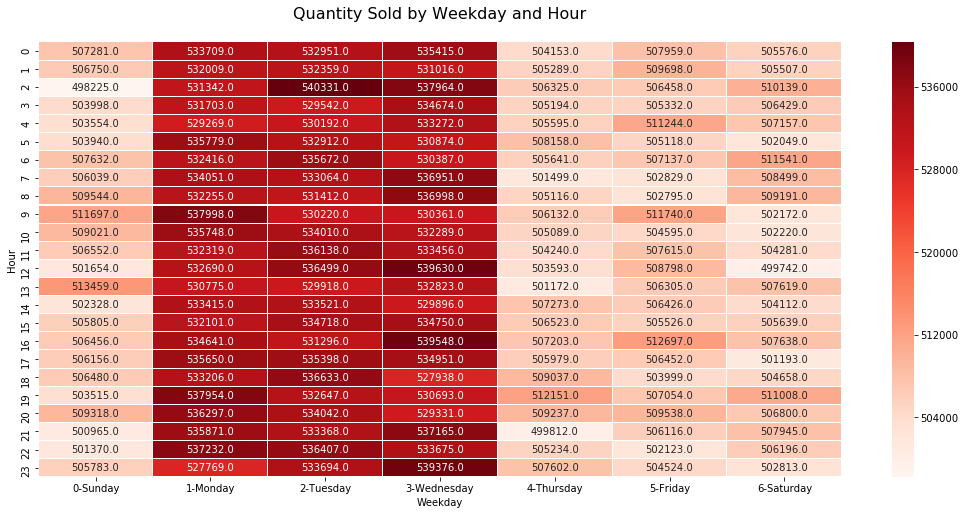

In [125]:
heatmap(hw_pivot, title='Quantity Sold by Weekday and Hour')

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [138]:
pids = np.random.choice(sales['ProductID'].unique(), 20)
daily_total = sales.loc[sales['ProductID'].isin(pids)].groupby(['Day', 'ProductID']).sum().reset_index()
daily_pivot = pd.pivot(daily_total, index='Day', columns='ProductID', values='Quantity')
daily_pivot

ProductID,14,60,66,78,92,94,112,120,121,138,163,214,236,264,270,327,398,446,448
Day,,,,,,,,,,,,,,,,,,,
1.0,6761,7205,7202,7377,7519,7569,7055,7934,7118,7371,7172,7700,7225,7879,7161,7720,6954,7108,7277
2.0,8451,7598,7405,7390,7840,7535,8042,7944,7987,6703,7852,7596,8076,7380,7723,7563,7463,7803,7484
3.0,7910,7634,7627,6810,7310,7302,7563,6870,7493,7410,7349,8026,7638,8178,7555,7559,7464,7111,7495
4.0,6937,6925,7652,6715,7886,7373,7019,7359,7897,7521,7315,8109,7134,7087,7669,7983,7117,7442,7556
5.0,7683,7549,7489,7076,7372,7559,8263,8313,7859,7331,7238,7476,7764,7195,7733,7372,7283,6977,7341
6.0,7892,7554,6864,7260,8285,7401,7479,7332,7776,7506,8071,7874,7394,6923,7728,7114,7867,7278,7540
7.0,7128,7531,7198,7644,7516,7548,7252,7478,7197,7754,7213,7366,7783,8187,7574,7199,7179,7441,7594
8.0,7833,7424,7386,7590,7452,7815,7942,7593,7186,7565,6982,7333,6898,7063,7381,7880,8022,7609,7062
9.0,7593,8039,7760,7985,8027,7656,7489,7248,6779,7442,7286,7620,7593,7903,7234,6994,7388,7077,7809


In [141]:
def correlation_plot(df, title=''):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    # cmap = sns.diverging_palette(6, 255, as_cmap=True)
    sns.heatmap(corr, mask=mask, center=0, linewidths=.5)
    plt.title(title + '\n', fontsize=20)

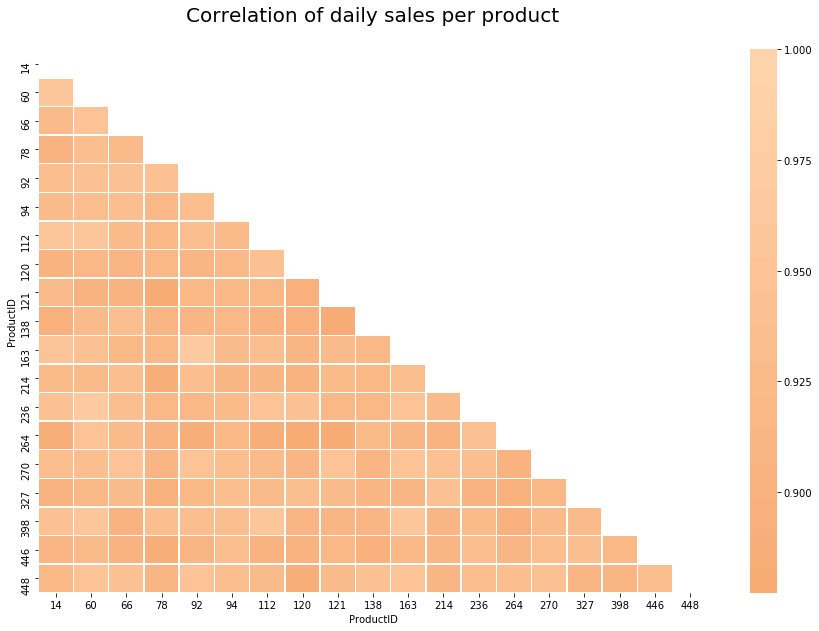

In [142]:
correlation_plot(daily_pivot, title='Correlation of daily sales per product')

### Create a histogram showing the distribution of daily units sold.

In [131]:
def histogram(df, field=None, length=8, width=15, title=''):
    plt.figure(figsize=(width, length))
    sns.distplot(df[field])
    plt.title(title + '\n', fontsize=16)

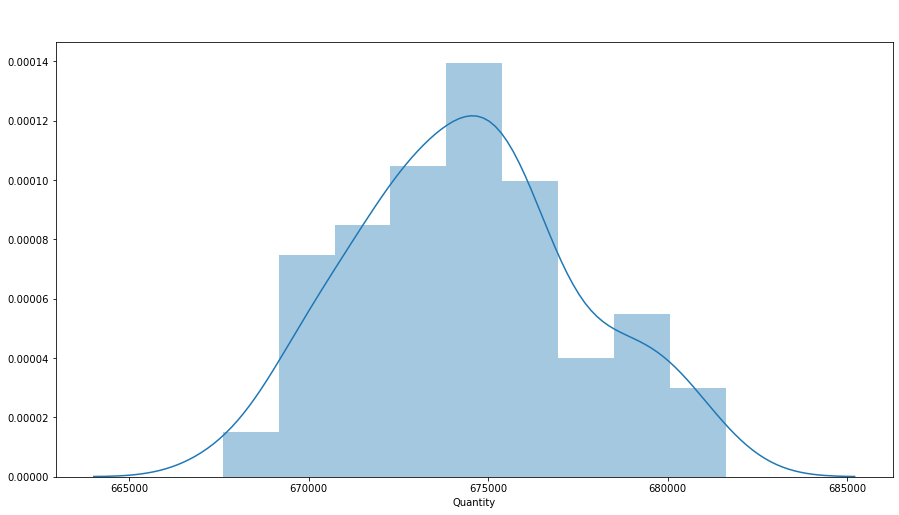

In [162]:
histogram(daily_units, 'Quantity')

### Create a violin plot showing the distribution of daily units sold by month.

In [143]:
def violin(df, x, y, length=8, width=15, title=''):
    plt.figure(figsize=(width, length))
    sns.violinplot(x=x, y=y, data=df)
    plt.title(title + '\n', fontsize=16)
    

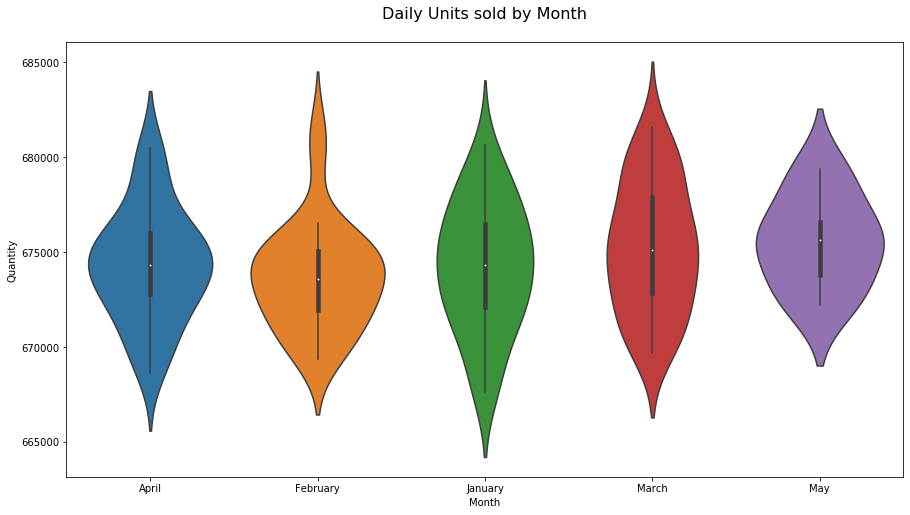

In [166]:
sales['Month'] = sales['SalesDate'].dt.month_name()
daily_month = sales.groupby(['Month', 'Date'], as_index=False).agg({'Quantity': 'sum'})
violin(daily_month, x='Month', y='Quantity', title='Daily Units sold by Month')